# Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import calendar
import os 
import warnings
warnings.filterwarnings('ignore')

# Read the Data

In [2]:
X_train = pd.read_csv('train.csv')
X_test = pd.read_csv('test.csv')
Y_train = pd.read_csv('train_label.csv',names = ['Total_booking'],header = None)
Y_test = pd.read_csv('test_label.csv',header = None)

In [3]:
X_train['Date']= X_train.datetime.apply(lambda x : x.split()[0])
X_train['hour'] = X_train.datetime.apply(lambda x : x.split()[1].split(':')[0])
X_train["weekday"] = X_train.Date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y").weekday()])
X_train["month"] = X_train.Date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y").month])

In [4]:
X_train['Total_booking'] = Y_train

In [5]:
df = X_train.copy()
df_copy = df.copy()
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Date,hour,weekday,month,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,5/2/2012,19,Wednesday,May,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,9/5/2012,4,Wednesday,September,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,1/13/2011,9,Thursday,January,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,11/18/2011,16,Friday,November,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,9/13/2011,13,Tuesday,September,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,1/16/2012,6,Monday,January,13
8704,11/10/2011 1:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11/10/2011,1,Thursday,November,11
8705,4/12/2011 3:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,4/12/2011,3,Tuesday,April,1
8706,11/7/2012 1:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,11/7/2012,1,Wednesday,November,92


In [6]:
df.drop('datetime',axis = 1,inplace = True)

In [7]:
# Zfill adds the zero from the length of the  value.
# To see the example how it works here is an example(https://www.w3schools.com/python/trypython.asp?filename=demo_ref_string_zfill2)
df['hour'] = df['hour'].apply(lambda x: x.zfill(2))
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Date,hour,weekday,month,Total_booking
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,5/2/2012,19,Wednesday,May,504
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,9/5/2012,04,Wednesday,September,5
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,1/13/2011,09,Thursday,January,139
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,11/18/2011,16,Friday,November,209
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,9/13/2011,13,Tuesday,September,184


# Visualize data using different visualizations to generate interesting insights

In [8]:
df['season'].value_counts()

Summer    2197
Fall      2189
Winter    2186
Spring    2136
Name: season, dtype: int64

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


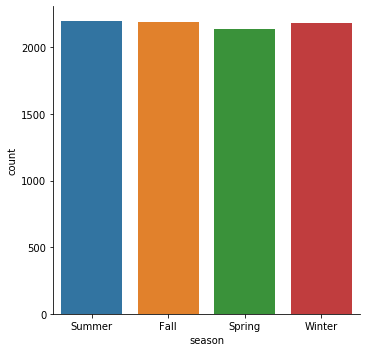

In [9]:
sns.factorplot(x='season',data=df,kind='count',size=5,aspect=1)

In [10]:
df.holiday.value_counts()

0    8460
1     248
Name: holiday, dtype: int64

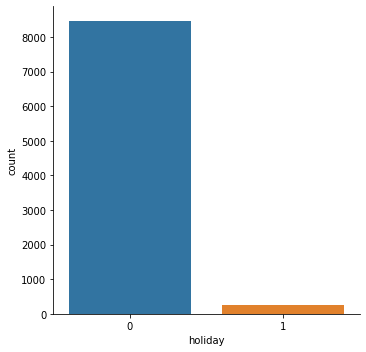

In [11]:
sns.factorplot(x ='holiday',data = df,kind = 'count')

In [12]:
df['weather'].value_counts()

 Clear + Few clouds            5753
 Mist + Cloudy                 2276
 Light Snow, Light Rain         678
 Heavy Rain + Thunderstorm        1
Name: weather, dtype: int64

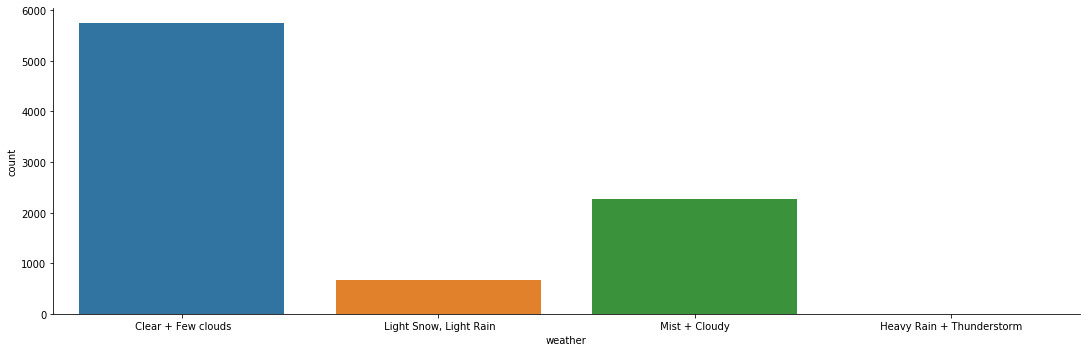

In [13]:

sns.factorplot(data = df,kind = 'count',x = 'weather',aspect = 3)

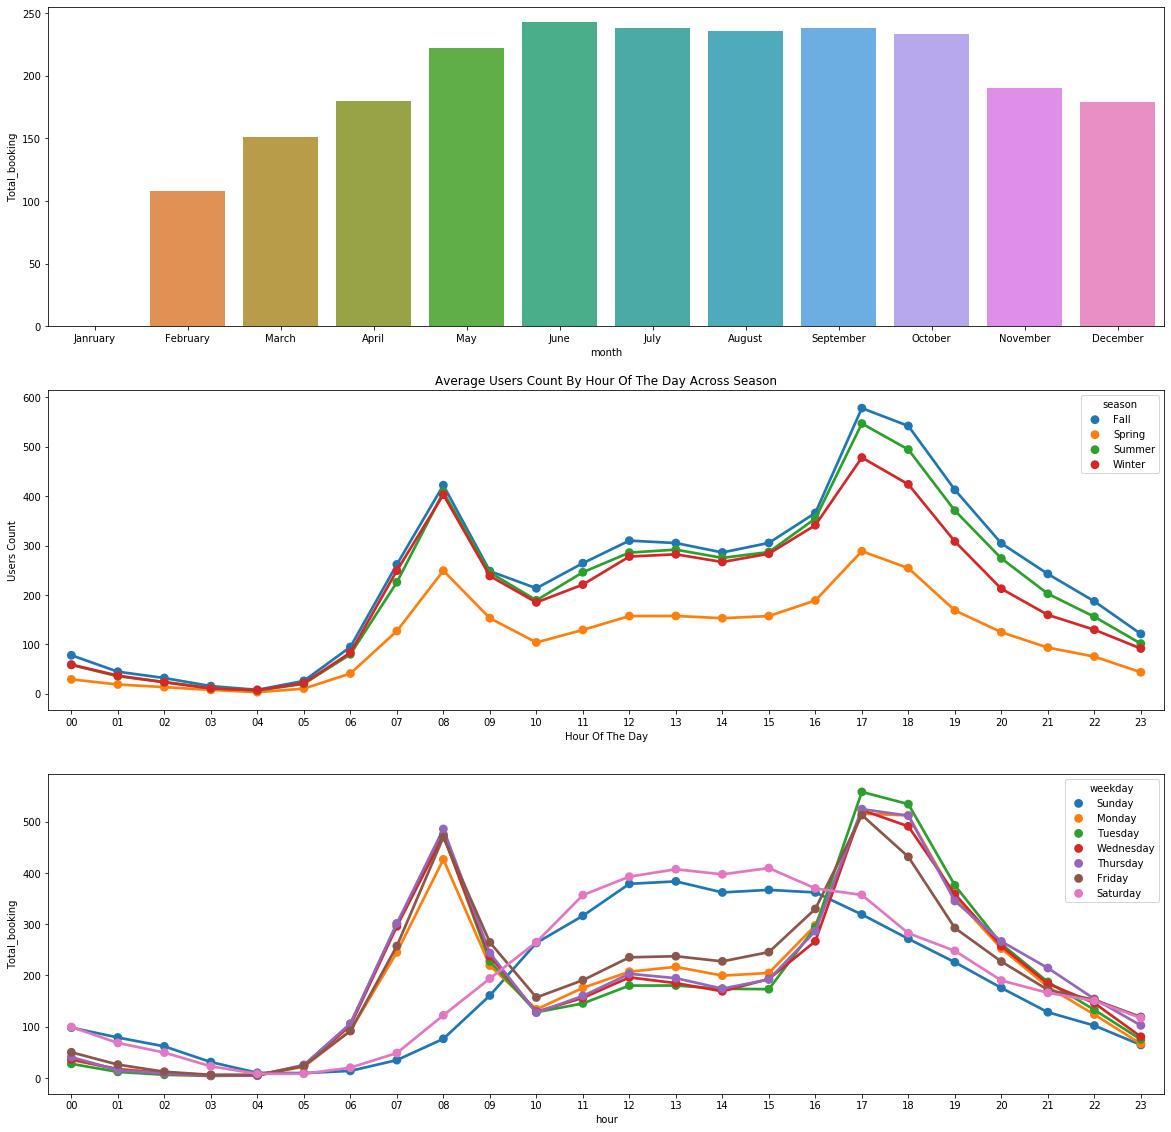

In [14]:
hueorder = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sortorder = ['Janruary','February','March','April','May','June','July',"August",'September','October','November','December']
fig,(ax1,ax2,ax3) = plt.subplots(nrows  = 3)
fig.set_size_inches(20,20) 
monthAggreation = pd.DataFrame(df.groupby('month')['Total_booking'].mean().reset_index())
monthsorted = monthAggreation.sort_values(by = 'Total_booking',ascending = False)
sns.barplot(data = monthsorted,x = 'month',y = 'Total_booking', ax = ax1,order = sortorder,hue_order = hueorder)

hourAggregated = pd.DataFrame(df.groupby(["hour","season"],sort=True)["Total_booking"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["Total_booking"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

hourAggregated = pd.DataFrame(df.groupby(['hour','weekday'],sort = True)['Total_booking'].mean()).reset_index()
sns.pointplot(x = hourAggregated['hour'], y = hourAggregated['Total_booking'], hue = hourAggregated['weekday'] ,hue_order = hueorder, data = hourAggregated, join = True,ax = ax3)

# Outlier

[Text(0, 0.5, 'Total_booking_count'), Text(0.5, 0, 'Workingday')]

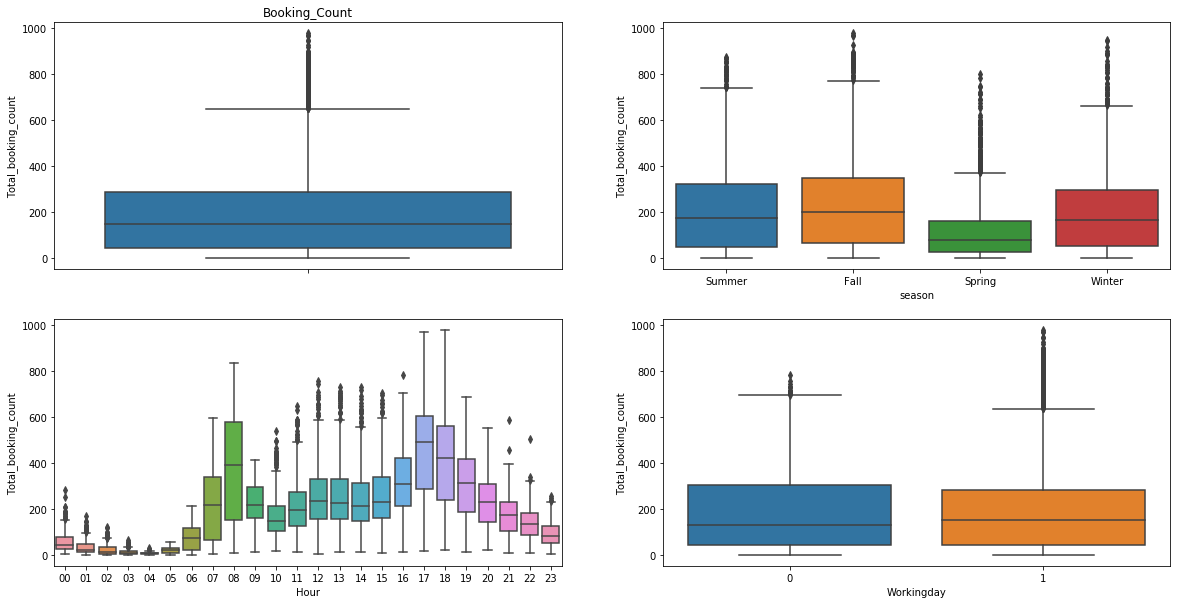

In [15]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(20,10)
sns.boxplot(data=df,y="Total_booking",orient="v",ax=ax[0][0])
sns.boxplot(data = df, y = 'Total_booking',x = 'season',ax = ax[0][1])
sns.boxplot(data = df,y = 'Total_booking',x = 'hour',ax = ax[1][0])
sns.boxplot(data=df,y="Total_booking",x="workingday",orient="v",ax=ax[1][1])


ax[0][0].set(ylabel = 'Total_booking_count',title = 'Booking_Count')
ax[0][1].set(ylabel = 'Total_booking_count',xlabel = 'season')
ax[1][0].set(ylabel = 'Total_booking_count',xlabel = 'Hour')
ax[1][1].set(ylabel = 'Total_booking_count',xlabel = 'Workingday')

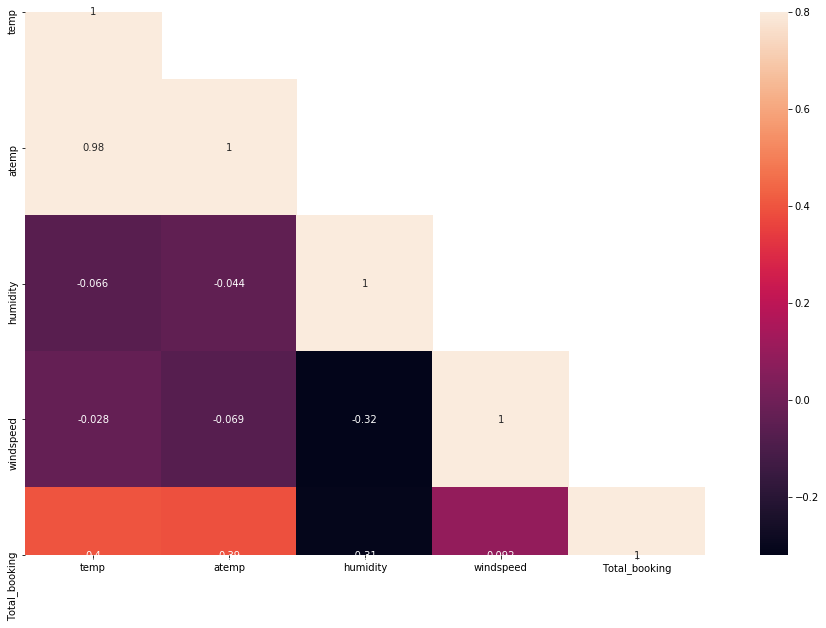

In [16]:
corrMatt = df[["temp","atemp","humidity","windspeed","Total_booking"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

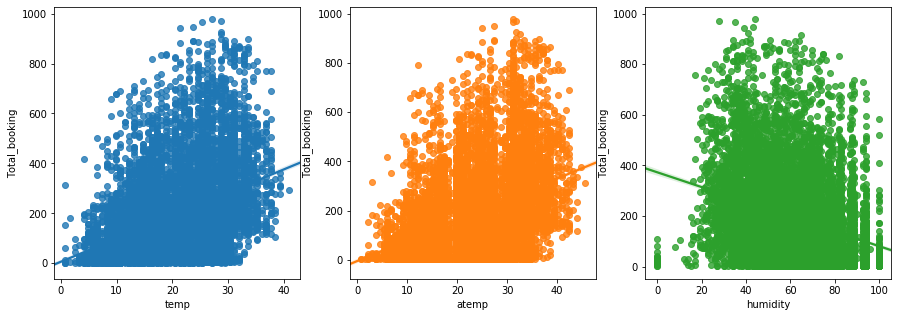

In [17]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols = 3)
fig.set_size_inches(15,5)
sns.regplot(x = 'temp',y = 'Total_booking',data = df,ax = ax1)
sns.regplot(x = 'atemp',y = 'Total_booking',data = df,ax = ax2)
sns.regplot(x = 'humidity',y = 'Total_booking',data = df,ax = ax3)

# Distribution Of Data

[Text(0.5, 1, 'Theoretical quantiles')]

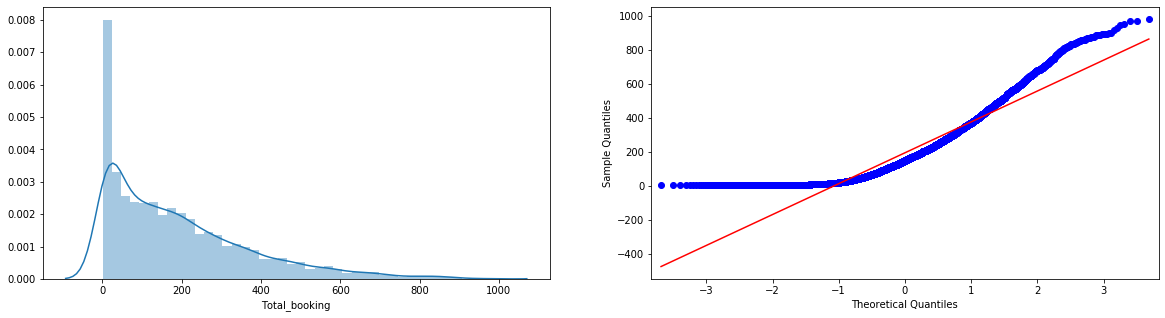

In [18]:
from statsmodels.graphics.gofplots import qqplot

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.distplot(df['Total_booking'], ax=ax1)

qqplot(df['Total_booking'], line='s', ax=ax2)
ax.set(title="Theoretical quantiles")

In [19]:
import math
df['Total_booking'] = df['Total_booking'].transform( lambda x: math.log(x))

[Text(0.5, 1, 'quantiles')]

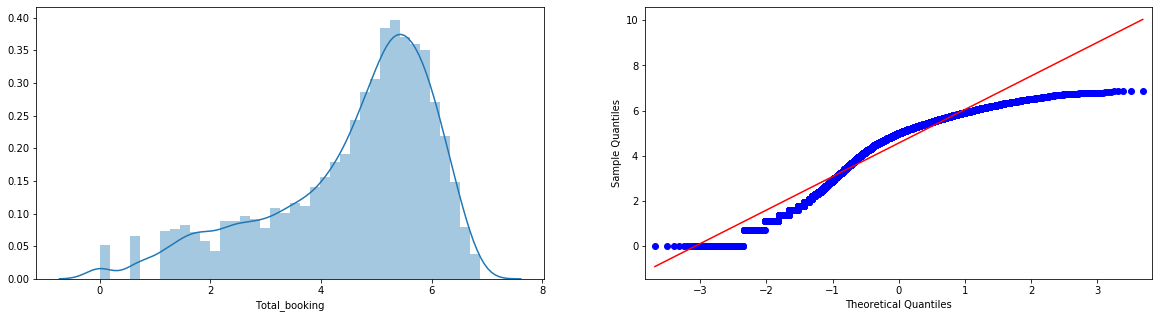

In [20]:
from statsmodels.graphics.gofplots import qqplot
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize= (20,5))
sns.distplot(df['Total_booking'],ax = ax1)
qqplot(df['Total_booking'],ax = ax2,line= 's')
ax.set(title = 'quantiles')

In [21]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Date,hour,weekday,month,Total_booking
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,5/2/2012,19,Wednesday,May,6.222576
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,9/5/2012,04,Wednesday,September,1.609438
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,1/13/2011,09,Thursday,January,4.934474
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,11/18/2011,16,Friday,November,5.342334
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,9/13/2011,13,Tuesday,September,5.214936


In [22]:
data = df_copy.append(X_test)
data.reset_index(inplace= True)
data.drop('index',inplace = True  ,axis = 1)

C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [23]:
data.tail()

,Date,Total_booking,atemp,datetime,holiday,hour,humidity,month,season,temp,weather,weekday,windspeed,workingday
10881,NaN,NaN,22.725,3/8/2012 3:00,0,NaN,63,NaN,Spring,18.86,Clear + Few clouds,NaN,26.0027,1
10882,NaN,NaN,17.425,1/12/2012 12:00,0,NaN,81,NaN,Spring,13.94,Mist + Cloudy,NaN,7.0015,1
10883,NaN,NaN,22.725,3/7/2012 22:00,0,NaN,59,NaN,Spring,18.86,Clear + Few clouds,NaN,19.9995,1
10884,NaN,NaN,21.210,5/12/2011 5:00,0,NaN,94,NaN,Summer,17.22,Clear + Few clouds,NaN,8.9981,1
10885,NaN,NaN,34.850,7/18/2012 16:00,0,NaN,66,NaN,Fall,30.34,Clear + Few clouds,NaN,16.9979,1


In [24]:
data['Date'] = data.datetime.apply(lambda x:x.split()[0])
data['hour'] = data.datetime.apply(lambda x:x.split()[1].split(':')[0]).astype('int')
data['year'] = data.datetime.apply(lambda x:x.split()[0].split('/')[2])
data["weekday"] = data.Date.apply(lambda dateString : datetime.strptime(dateString,"%m/%d/%Y").weekday())
data["month"] = data.Date.apply(lambda dateString : datetime.strptime(dateString,"%m/%d/%Y").month)

In [25]:
data.head()

,Date,Total_booking,atemp,datetime,holiday,hour,humidity,month,season,temp,weather,weekday,windspeed,workingday,year
0,5/2/2012,504.0,25.760,5/2/2012 19:00,0,19,77,5,Summer,22.14,Clear + Few clouds,2,16.9979,1,2012
1,9/5/2012,5.0,33.335,9/5/2012 4:00,0,4,79,9,Fall,28.70,Clear + Few clouds,2,19.0012,1,2012
2,1/13/2011,139.0,6.060,1/13/2011 9:00,0,9,50,1,Spring,5.74,Clear + Few clouds,3,22.0028,1,2011
3,11/18/2011,209.0,16.665,11/18/2011 16:00,0,16,29,11,Winter,13.94,Clear + Few clouds,4,8.9981,1,2011
4,9/13/2011,184.0,33.335,9/13/2011 13:00,0,13,51,9,Fall,30.34,Clear + Few clouds,1,19.0012,1,2011


In [26]:
from sklearn.preprocessing  import minmax_scale
data[['atemp','humidity','temp','windspeed']] = minmax_scale(data[['atemp','humidity','temp','windspeed']])

In [27]:
data.head()

,Date,Total_booking,atemp,datetime,holiday,hour,humidity,month,season,temp,weather,weekday,windspeed,workingday,year
0,5/2/2012,504.0,0.559347,5/2/2012 19:00,0,19,0.77,5,Summer,0.530612,Clear + Few clouds,2,0.298225,1,2012
1,9/5/2012,5.0,0.728829,9/5/2012 4:00,0,4,0.79,9,Fall,0.693878,Clear + Few clouds,2,0.333373,1,2012
2,1/13/2011,139.0,0.118581,1/13/2011 9:00,0,9,0.50,1,Spring,0.122449,Clear + Few clouds,3,0.386035,1,2011
3,11/18/2011,209.0,0.355856,11/18/2011 16:00,0,16,0.29,11,Winter,0.326531,Clear + Few clouds,4,0.157870,1,2011
4,9/13/2011,184.0,0.728829,9/13/2011 13:00,0,13,0.51,9,Fall,0.734694,Clear + Few clouds,1,0.333373,1,2011


In [ ]:
data_dummy = data

def dummify_dataset(df, column):       
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column, drop_first=True)],axis=1)
    df = df.drop([column], axis=1)
    return df

columns_to_dummify = ['season', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']
for column in columns_to_dummify:
    data_dummy = dummify_dataset(data_dummy, column)

In [51]:
data_dummy.head(10)

,Date,Total_booking,atemp,datetime,humidity,temp,windspeed,year,season_Spring,season_Summer,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,5/2/2012,504.0,0.559347,5/2/2012 19:00,0.77,0.530612,0.298225,2012,0,1,...,0,1,0,0,0,0,1,0,0,0
1,9/5/2012,5.0,0.728829,9/5/2012 4:00,0.79,0.693878,0.333373,2012,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1/13/2011,139.0,0.118581,1/13/2011 9:00,0.50,0.122449,0.386035,2011,1,0,...,0,0,1,0,0,0,1,0,0,0
3,11/18/2011,209.0,0.355856,11/18/2011 16:00,0.29,0.326531,0.157870,2011,0,0,...,0,0,0,1,0,0,1,0,0,0
4,9/13/2011,184.0,0.728829,9/13/2011 13:00,0.51,0.734694,0.333373,2011,0,0,...,1,0,0,0,0,0,1,0,0,0
5,8/17/2012,791.0,0.254167,8/17/2012 17:00,0.36,0.816327,0.386035,2012,0,0,...,0,0,0,1,0,0,1,0,0,0
6,10/6/2012,395.0,0.644032,10/6/2012 9:00,0.73,0.591837,0.228047,2012,0,0,...,0,0,0,0,1,0,0,0,0,0
7,9/10/2012,5.0,0.542343,9/10/2012 4:00,0.68,0.510204,0.333373,2012,0,0,...,0,0,0,0,0,0,1,0,0,0
8,7/14/2012,9.0,0.677928,7/14/2012 4:00,0.61,0.653061,0.122840,2012,0,0,...,0,0,0,0,1,0,0,0,1,0
9,2/6/2011,78.0,0.321960,2/6/2011 18:00,0.56,0.285714,0.193018,2011,1,0,...,0,0,0,0,0,1,0,0,0,0


In [52]:
data_dummy = data_dummy.drop(['atemp'],axis = 1)

In [63]:
train_data = data_dummy[pd.notnull(data['Total_booking'])]
test_data = data_dummy[~pd.notnull(data['Total_booking'])]
train_data.reset_index(drop = True)

,Date,Total_booking,datetime,humidity,temp,windspeed,year,season_Spring,season_Summer,season_Winter,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,5/2/2012,504.0,5/2/2012 19:00,0.77,0.530612,0.298225,2012,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,9/5/2012,5.0,9/5/2012 4:00,0.79,0.693878,0.333373,2012,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1/13/2011,139.0,1/13/2011 9:00,0.50,0.122449,0.386035,2011,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,11/18/2011,209.0,11/18/2011 16:00,0.29,0.326531,0.157870,2011,0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,9/13/2011,184.0,9/13/2011 13:00,0.51,0.734694,0.333373,2011,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,1/16/2012,13.0,1/16/2012 6:00,0.54,0.081633,0.105325,2012,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8704,11/10/2011,11.0,11/10/2011 1:00,0.87,0.387755,0.000000,2011,0,0,1,...,0,0,1,0,0,0,1,0,0,1
8705,4/12/2011,1.0,4/12/2011 3:00,0.56,0.571429,0.157870,2011,0,1,0,...,1,0,0,0,0,0,1,0,0,1
8706,11/7/2012,92.0,11/7/2012 1:00,0.61,0.265306,0.298225,2012,0,0,1,...,0,1,0,0,0,0,1,0,0,1


In [65]:
X_new_train = train_data.drop(['Date','Total_booking','datetime'],axis = 1) # Is is normalized
X_new_test = test_data.drop(['Date','Total_booking','datetime'],axis = 1)

In [66]:
X_new_train.head()

,humidity,temp,windspeed,year,season_Spring,season_Summer,season_Winter,month_2,month_3,month_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,0.77,0.530612,0.298225,2012,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0.79,0.693878,0.333373,2012,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0.50,0.122449,0.386035,2011,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0.29,0.326531,0.157870,2011,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0.51,0.734694,0.333373,2011,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,0.54,0.081633,0.105325,2012,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8704,0.87,0.387755,0.000000,2011,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
8705,0.56,0.571429,0.157870,2011,0,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
8706,0.61,0.265306,0.298225,2012,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [67]:
X_new_train.head()

,humidity,temp,windspeed,year,season_Spring,season_Summer,season_Winter,month_2,month_3,month_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,0.77,0.530612,0.298225,2012,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0.79,0.693878,0.333373,2012,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0.50,0.122449,0.386035,2011,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0.29,0.326531,0.157870,2011,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0.51,0.734694,0.333373,2011,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


# Building a Model

In [81]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error, make_scorer
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score

In [78]:
def rmsle(y_test,test_pred):
    return (np.sqrt(mean_squared_log_error(y_test,test_pred)))

In [79]:
rmsle_ = make_scorer(rmsle)

In [115]:
models = [RandomForestRegressor(), ExtraTreesRegressor(), AdaBoostRegressor(),KNeighborsRegressor(),SVR()]
models_name = ['RandomForest','ExtraTrees','AdaBoost','KNN','SVR']
rmsle = []
d = {}
def test_algo(model):
    kfold = KFold(n_splits = 10, random_state = 42)
    predicted = cross_val_score(model, X_new_train, np.log(Y_train), cv = kfold , scoring = rmsle_)
    rmsle.append(predicted.mean())


In [116]:
for model in models:
    test_algo(model)


In [118]:
d= {'Modelling Algo':models_name,'CROSS VAL RMSLE':rmsle}

In [119]:
rmsle_frame=pd.DataFrame(d)
rmsle_frame

,Modelling Algo,CROSS VAL RMSLE
0,RandomForest,0.129877
1,ExtraTrees,0.133762
2,AdaBoost,0.254729
3,KNN,0.187698
4,SVR,0.375278


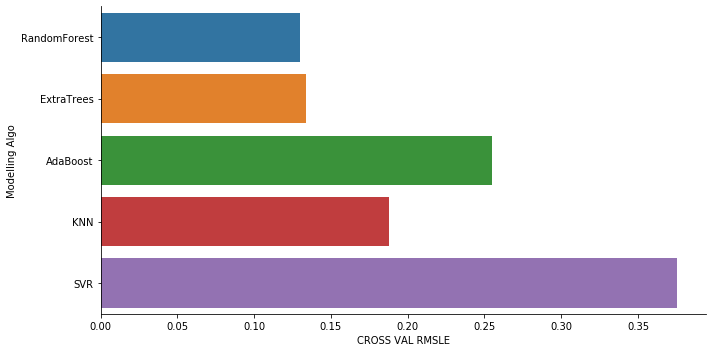

In [124]:
import seaborn as sns
sns.factorplot(y='Modelling Algo',x='CROSS VAL RMSLE',data=rmsle_frame,kind='bar',size=5,aspect=2)

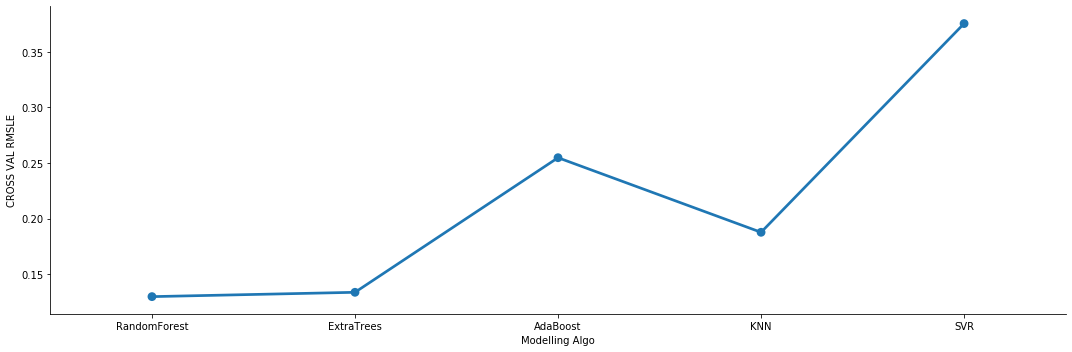

In [130]:
sns.factorplot(data = rmsle_frame,x='Modelling Algo',y='CROSS VAL RMSLE',kind = 'point',aspect = 3)

In [133]:
# Here we can see SVR and Ada Boost give us the best results
rgb = SVR().fit(X_new_train,np.log(Y_train))
test_predict = rgb.predict(X_new_test)

In [138]:
print('SVR', np.sqrt(mean_squared_log_error(np.log(Y_test),test_predict)))

SVR 0.3877627321087398
